<a href="https://colab.research.google.com/github/amandacmelo/Projeto-Ciencia-de-Dados/blob/main/Infer%C3%AAncia%20Estat%C3%ADstica%20e%20Regras%20de%20Associa%C3%A7%C3%A3o/Infer%C3%AAncia_Estat%C3%ADstica_e_Regras_de_Associa%C3%A7%C3%A3o_Cidades_Turisticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

 # 🟢 **Análise Inferencial: Impacto da Pandemia na Empregabilidade em Cidades Turísticas**

Na etapa anterior de Análise Exploratória dos Dados, foi realizada uma comparação entre cidades turísticas e não turísticas quanto ao impacto da pandemia de COVID-19 na empregabilidade, considerando tanto o número de pessoas assalariadas quanto o total de ocupados. Os gráficos produzidos sugeriram que as cidades turísticas apresentaram uma queda mais acentuada nesses indicadores ao longo do ano de 2020.

A partir dessa observação, surge a seguinte pergunta de pesquisa:

**"Cidades turísticas sofreram maior queda no percentual de crescimento de pessoas assalariadas durante o período da COVID-19?"**

Para responder a essa questão de forma estatisticamente, será conduzida uma análise inferencial por meio de teste de hipótese, a fim de avaliar se há diferença significativa entre os grupos de municípios.

###**Formulação das Hipóteses**

Dado que estamos comparando dois grupos independentes (cidades turísticas e não turísticas), as hipóteses do teste t são:

**Hipótese Nula (H₀):** Não há diferença significativa no número de pessoas assalariadas entre cidades turísticas e não turísticas durante o ano de 2020.

**Hipótese Alternativa (H₁):** Existe diferença significativa no número de pessoas assalariadas entre cidades turísticas e não turísticas durante o ano de 2020.

### **Amostragem e Representatividade**
Vale destacar que na etapa exploratória anterior, a análise foi baseada em apenas 10 cidades mais turísticas do Brasil, escolhidas por sua relevância nacional e maior volume populacional. No entanto, essa amostra é altamente enviesada e não adequada para inferência estatística, uma vez que não representa a diversidade das cidades turísticas brasileiras.

Nesta nova etapa, buscamos garantir representatividade e validade estatística. Para isso:

Consideramos como população todas as cidades classificadas como turísticas segundo o Mapa do Turismo Brasileiro, disponibilizado pelo Ministério do Turismo(1). A partir dessa população, será construída uma amostra representativa para permitir análises mais robustas e generalizáveis.

1- Mapa - Ministério do Turismo. Disponível em: <https://www.mapa.turismo.gov.br/mapa/init.html#/home>. Acesso em: 11 maio. 2025.



**Obtendo os dados de população**

Na primeira célula, a partir do dataset obtido no site do ministério do turismo foram obtidos os nomes dos munícipios que são considerados turísticos. Com tais nomes em mãos, selecionamos no dataset principal estes munícipios que são de nosso interesse.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/Datasets%20sobre%20Turismo/Municipios_turisticos.csv"

populacao_municipios_turisticos = pd.read_csv(url)

populacao2 = dados[dados["Municipio"].isin(populacao_municipios_turisticos["Município"])]


**Escolha da Amostra**

Com os dados da população em mãos, o próximo passo é selecionar uma amostra que seja representativa e diversa. Para isso, foi construída uma função que calcula o desvio padrão da população e determina o erro padrão utilizando a seguinte fórmula:

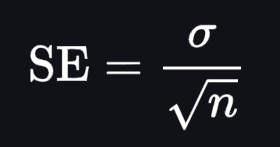

- A primeira amostra testada contém os **10 municípios mais turísticos do Brasil**, ou seja, localidades de grande relevância nacional e com populações significativamente elevadas. Como era de se esperar, essa amostra apresentou uma distância de 37,73 erros padrão em relação à média da população geral — um valor extremamente alto, o que evidencia a baixa representatividade da amostra.

- A amostra de número 2 foi obtida a partir de múltiplas tentativas de sortear um conjunto de cidades que formassem uma boa amostra. O grupo achou o tamanho de amostra igual a 724 de bom tamanho, já que o dataset obtido possui 2195 cidades — **amostra = 33% do tamanho da população total.**
Por fim, encontramos uma amostra com distancia de 0.41 erros padrão, o que é considerada uma distancia muito boa.

Após encontrar tal amostra salvamos ela e subimos para o repositório do gitHub.

In [3]:
def verificaAmostra(amostra, populacao):
  mediaPopulacao = populacao.mean()
  mediaAmostra = amostra.mean()
  desvioPopulacao = populacao.std()

  erroPadrao = desvioPopulacao / np.sqrt(amostra.size)
  distancia = abs(mediaPopulacao - mediaAmostra) / erroPadrao

  print(f"Média Amostral: {mediaAmostra:.2f}")
  print(f"Média População: {mediaPopulacao:.2f}")
  print(f"Desvio Padrão População: {desvioPopulacao:.2f}")
  print(f"Erro Padrão: {erroPadrao:.2f}")
  print(f"Distância: {distancia:.2f} erros padrão")

In [4]:
#Amostra 1

cidades_turisticas = [
    "Rio de Janeiro", "Maceió", "São Paulo", "Porto de Galinhas",
    "Porto Seguro", "Gramado", "Natal", "Fortaleza",
    "Campos do Jordão", "Salvador", "Maragogi", "Foz do Iguaçu",
    "João Pessoa", "Recife", "Caldas Novas", "Florianópolis", "Olímpia",
    "Balneário Camboriú", "Ilhéus", "Curitiba"
]

amostra_1 = dados[dados["Municipio"].isin(cidades_turisticas)]
verificaAmostra(amostra_1["PessoalAssalariado"], populacao2["PessoalAssalariado"])

Média Amostral: 679673.00
Média População: 53455.94
Desvio Padrão População: 177198.64
Erro Padrão: 16596.17
Distância: 37.73 erros padrão


In [5]:
#Amostra 2
import random

amostra_2 = populacao2.sample(n=724)
#print(amostra_2["Municipio"])

verificaAmostra(amostra_2["PessoalAssalariado"], populacao2["PessoalAssalariado"])

Média Amostral: 60947.17
Média População: 53455.94
Desvio Padrão População: 177198.64
Erro Padrão: 6585.54
Distância: 1.14 erros padrão


In [6]:
import os

amostra_2.to_csv('amostra_2.csv', index=False)
print(os.getcwd())

/content


In [7]:
url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/Datasets%20sobre%20Turismo/amostra_2.csv"

amostra_2 = pd.read_csv(url)
verificaAmostra(amostra_2["PessoalAssalariado"], populacao2["PessoalAssalariado"])

Média Amostral: 50784.44
Média População: 53455.94
Desvio Padrão População: 177198.64
Erro Padrão: 6585.54
Distância: 0.41 erros padrão


###**Teste t de Welch para Diferença entre Médias da Variação Percentual de Assalariados**
O teste t de Welch é utilizado para comparar as médias da variação percentual no número de pessoas assalariadas entre dois grupos de municípios: turísticos e não turísticos, considerando que as variâncias podem ser diferentes entre os grupos.

Neste caso, foi realizado um balanceamento entre os grupos, ou seja, foi selecionado o mesmo número de municípios turísticos e não turísticos para garantir uma comparação mais justa e estatisticamente adequada. Isso evita que o resultado seja enviesado pelo fato de haver, originalmente, muito mais cidades não turísticas no conjunto de dados.

A estatística t e o valor-p (p-valor) são calculados com base nos dados da variação entre os anos de 2019 e 2020.

Critério de decisão:

- Se \( p < 0,05 \), rejeita-se a hipótese nula. Isso significa que há evidência estatística de que municípios turísticos apresentaram uma variação significativamente diferente no número de assalariados em comparação com municípios não turísticos.

- Se \( p < 0,05 \), não se rejeita a hipótese nula. Nesse caso, não há evidência suficiente para afirmar que as variações nas médias dos dois grupos são diferentes.


In [8]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

df_pivot = dados.pivot_table(index="Municipio", columns="Ano", values="PessoalAssalariado", aggfunc="mean")

df_pivot["variacao_percentual"] = ((df_pivot[2020] - df_pivot[2019]) / df_pivot[2019]) * 100
df_pivot["turistica"] = df_pivot.index.isin(populacao2["Municipio"])

grupo_turistico = df_pivot[df_pivot["turistica"]]["variacao_percentual"].dropna()
grupo_nao_turistico = df_pivot[~df_pivot["turistica"]]["variacao_percentual"].dropna()

#Balanceamento: sorteia mesmo número de não turísticos
n_turisticos = len(grupo_turistico)
grupo_nao_turistico_amostra = grupo_nao_turistico.sample(n=n_turisticos, random_state=42)

stat, pvalue = ttest_ind(grupo_turistico, grupo_nao_turistico_amostra, equal_var=False)

print("### Teste t de Welch - Comparação da variação percentual de assalariados (amostras balanceadas)")
print(f"Número de municípios por grupo: {n_turisticos}")
print(f"Estatística t: {stat:.2f}")
print(f"Valor-p: {pvalue:.9f}")
print("\n")

alpha = 0.05
if pvalue < alpha:
    print("Resultado: Rejeita-se a hipótese nula. Há evidência de que cidades turísticas tiveram uma variação significativamente diferente no número de assalariados em 2020.")
else:
    print("Resultado: Não se rejeita a hipótese nula. Não há evidência de diferença significativa entre os grupos.")


### Teste t de Welch - Comparação da variação percentual de assalariados (amostras balanceadas)
Número de municípios por grupo: 397
Estatística t: -4.61
Valor-p: 0.000005372


Resultado: Rejeita-se a hipótese nula. Há evidência de que cidades turísticas tiveram uma variação significativamente diferente no número de assalariados em 2020.


Após o balanceamento das amostras, os resultados do teste t de Welch indicam que há uma diferença estatisticamente significativa na variação percentual do número de assalariados entre municípios turísticos e não turísticos no período de 2019 a 2020. **Isso sugere que os municípios turísticos foram afetados de forma distinta durante esse período**

**Aplicando a Amostra**

Com uma amostra representativa, é possível verificar se é a análise anterior com os graficos possui o mesmo comportamento com a amostra como conjunto de dados.

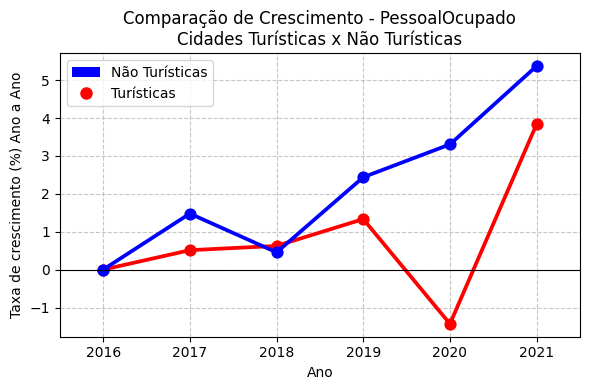

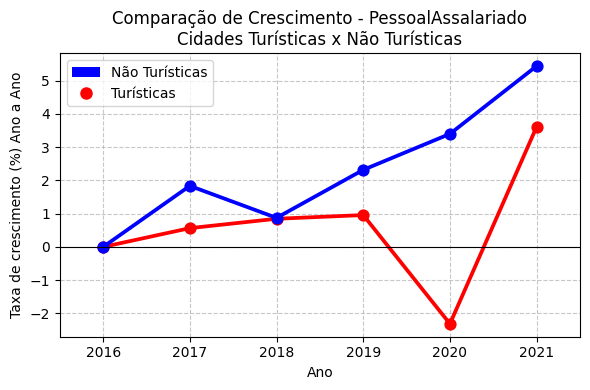

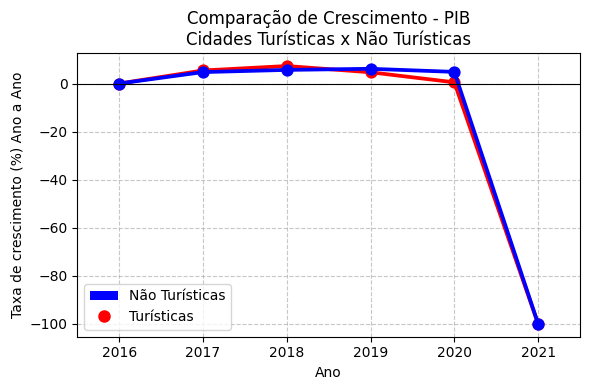

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import random

dados = dados[dados["Ano"].isin([2016,2017, 2018, 2019, 2020, 2021])]

for tipo in ["PessoalOcupado", "PessoalAssalariado", "PIB"]:

    dados_turisticos = dados[dados["Municipio"].isin(amostra_2["Municipio"])]
    dados_normais = dados[~dados["Municipio"].isin(amostra_2["Municipio"])]

    dados_turisticos = dados_turisticos.groupby("Ano")[tipo].sum().reset_index()
    dados_normais = dados_normais.groupby("Ano")[tipo].sum().reset_index()

    valores_turisticos = list(dados_turisticos[tipo])
    diferencas_turisticos = [0]
    for i in range(1, len(valores_turisticos)):
        x = (((valores_turisticos[i] - valores_turisticos[i - 1]) / valores_turisticos[i - 1]) * 100)
        diferencas_turisticos.append(x)
    dados_turisticos["DiferencaAnoAnterior"] = diferencas_turisticos

    valores_normais = list(dados_normais[tipo])
    diferencas_normais = [0]
    for i in range(1, len(valores_normais)):
        x = (((valores_normais[i] - valores_normais[i - 1]) / valores_normais[i - 1]) * 100)
        diferencas_normais.append(x)
    dados_normais["DiferencaAnoAnterior"] = diferencas_normais

    fig, ax1 = plt.subplots(figsize=(6, 4))
    sns.pointplot(data=dados_turisticos, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax1, label="Turísticas")
    sns.pointplot(data=dados_normais, x="Ano", y="DiferencaAnoAnterior", color="blue", ax=ax1, label="Não Turísticas")

    ax1.set_ylabel("Taxa de crescimento (%) Ano a Ano")
    ax1.set_title(f"Comparação de Crescimento - {tipo}\nCidades Turísticas x Não Turísticas")
    ax1.axhline(0, color="black", linewidth=0.8)
    ax1.grid(True, linestyle="--", alpha=0.7)

    legend_elements = [
        Patch(facecolor='blue', label='Não Turísticas'),
        Line2D([0], [0], marker='o', color='red', label='Turísticas', linestyle='', markersize=8)
    ]
    ax1.legend(handles=legend_elements)

    plt.tight_layout()
    plt.show()

Com base no gráfico apresentado, é possível observar que a amostra representativa das cidades turísticas demonstrou um comportamento muito semelhante tanto ao grupo das 10 cidades mais turísticas utilizado na análise anterior quanto à população total de cidades turísticas. As variações na taxa de crescimento do pessoal assalariado seguiram uma tendência consistente ao longo dos anos, incluindo as quedas e recuperações típicas observadas nos dados globais.

# 🟢 **Regras de Associação**

###**Regra de associação entre cidade turistica e PIB abaixo da media nacional no ano de 2020**

Nesta análise, buscamos identificar padrões de associação entre cidades turísticas e aquelas que apresentaram um Produto Interno Bruto (PIB) abaixo da média geral dos municípios no ano de 2020, em período da pandemia da COVID-19. Para isso, utilizamos o algoritmo Apriori, aplicado a um conjunto de dados municipais.

Primeiramente, utilizando do dataset de cidades turísticas importado anteriormente selecionamos tais municípios no nosso dataset e criamos colunas booleanas que indicam se uma cidade é turística e se possui um PIB abaixo da média nacional para o ano de 2020 em dataframe "dados_apriori". Essas variáveis binárias permitiram aplicar o algoritmo Apriori, que identifica combinações frequentes de características em diferentes cidades.

Essas regras de associação são úteis para compreender correlações entre variáveis socioeconômicas e de atratividade regional. A partir dos resultados obtidos, é possível, por exemplo, avaliar se a atividade turística está de fato associada a melhores condições econômicas ou se há municípios turísticos que, mesmo com esse potencial, enfrentaram desafios econômicos em 2020.

Vale ressaltar que o suporte mínimo adotado foi de 2%.


**OBSERVAÇÃO:**

Durante a preparação dos dados para aplicação do algoritmo Apriori, foi necessário garantir que cada município aparecesse apenas uma vez na base filtrada para o ano de 2020. Para isso, utilizou-se o método drop_duplicates(subset="Municipio").

Embora o número de municípios com registros duplicados no dataset original tenha sido pequeno, a remoção foi realizada por uma questão de lógica e consistência na análise. A presença de múltiplas entradas para um mesmo município poderia afetar a contagem de ocorrências das características investigadas, ainda que de forma sutil.

Optou-se, portanto, por manter apenas uma entrada por município para assegurar que cada cidade tivesse o mesmo peso estatístico na análise.

In [17]:
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

dados_apriori_PIB = pd.DataFrame()
dados_analise = dados[dados["Ano"].isin([2020])]
dados_analise = dados_analise.sort_values("PIB", ascending=False).drop_duplicates(subset="Municipio")

#Regra de associação PIB

dados_apriori_PIB["Turistica"] = dados_analise["Municipio"].isin(populacao2["Municipio"])

media_PIB_2020 = dados[dados["Ano"] == 2020]["PIB"].mean()
dados_apriori_PIB["PIB_menor_media"] = (dados_analise[dados_analise["Ano"] == 2020]["PIB"] < media_PIB_2020).astype(int)

print("Associação entre PIB e cidades Turísticas no ano de 2020")
print(apriori(dados_apriori_PIB, min_support=0.02))


Associação entre PIB e cidades Turísticas no ano de 2020
    support itemsets
0  0.074948      (0)
1  0.868227      (1)
2  0.025486   (0, 1)


Nesta etapa, como explicitado anteriormente, utilizamos o algoritmo Apriori para identificar padrões de concorrência entre duas características de municípios brasileiros no ano de 2020.

Por meio do resultado podemos concluir que:

- Apenas 7,49% dos municípios do conjunto de dados são turísticos _ o que realmente faz sentido já que o dataset original possui 5297 municipios, enquanto o que possui apenas as cidades turisticas tem 403.
(7,49% * 5297 = 397)

- O item 1 é muito frequente, aparecendo em 87,38% dos municípios. Isso indica que o PIB abaixo da média é bem comum nos dois tipos de município.

- Por fim, a combinação dos itens 0 e 1 ocorre em **2,60%** dos municípios, o que significa que ser turístico (0) e ter PIB abaixo da média (1) ocorrem juntos em uma proporção relativamente baixa.

Desta maneira, devido a baixa correlação entre tais fatores (2,60%), ressaltamos que provavelmente não exista correlação entre ter PIB no ano de 2020 abaixo da media com ser um município turístico.


In [18]:
from mlxtend.frequent_patterns import apriori, association_rules

dados_apriori_PIB = dados_apriori_PIB.astype(bool)

frequent_itemsets = apriori(dados_apriori_PIB, min_support=0.01, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

print(regras[["antecedents", "consequents", "support", "confidence"]])

         antecedents        consequents   support  confidence
0        (Turistica)  (PIB_menor_media)  0.025486    0.340050
1  (PIB_menor_media)        (Turistica)  0.025486    0.029354


Por fim, após aplicar e analisar o indicador de confiança, observamos que:

A regra “Se o município é turístico, então ele tem PIB abaixo da média” tem uma confiança de 34%, ou seja, entre todos os municípios turísticos, apenas 34% também apresentaram PIB abaixo da média.

Já a regra inversa, “Se o município tem PIB abaixo da média, então ele é turístico”, apresenta uma confiança de apenas 2,9%, indicando que é muito raro um município com PIB abaixo da média ser também turístico.

Desta maneira, com a métrica de confiança foi possível confirmarmos de que existe uma correlação relativamente baixa entre ser turística e ter o PiB abaixo da media no ano de 2020. O fato de uma cidade ser turística implica em uma chance de 34% dela ter tido um PIB abaixo da média nacional no ano de 2020.

###**Regra de associação entre cidade turistica e Pessoal assalariado abaixo da media nacional no ano de 2020**

Nesta segunda análise, replicamos o procedimento anterior, mas substituímos o PIB pela variável Pessoal Assalariado.

O objetivo foi investigarmos se municípios turísticos também apresentam alguma associação com uma menor quantidade de pessoas empregadas formalmente. A estrutura do algoritmo Apriori permaneceu a mesma, sendo utilizadas colunas booleanas que indicavam se o município era turístico e se possuía um número de assalariados inferior à média nacional.


In [19]:
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

dados_analise = dados[dados["Ano"].isin([2020])]
dados_analise = dados_analise.sort_values("PessoalAssalariado", ascending=False).drop_duplicates(subset="Municipio")

dados_apriori_assalariados = pd.DataFrame()

#Regra de associação Pessoal Assalariado
dados_apriori_assalariados["Turistica"] = dados_analise["Municipio"].isin(populacao2["Municipio"])
media_Assalariados_2020 = dados_analise[dados_analise["Ano"] == 2020]["PessoalAssalariado"].mean()
dados_apriori_assalariados["Assalariados_menor_media"] = (dados_analise[dados_analise["Ano"] == 2020]["PessoalAssalariado"] < media_Assalariados_2020).astype(int)

print("Associação entre número de pessoas Assalariadas e cidades Turisticas no ano de 2020")
print(apriori(dados_apriori_assalariados, min_support=0.02))


Associação entre número de pessoas Assalariadas e cidades Turisticas no ano de 2020
    support itemsets
0  0.074948      (0)
1  0.885784      (1)
2  0.027752   (0, 1)


Os resultados indicaram que 88,55% dos municípos obtiveram o número de pessoal assalariado abaixo da media do país em 2020 e que apenas **2,77%** dos municípios possuem simultaneamente essas duas características, sugerindo, novamente, uma baixa associação entre ser turístico e ter menor empregabilidade formal no ano de 2020.

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules

dados_apriori_assalariados = dados_apriori_assalariados.astype(bool)

frequent_itemsets = apriori(dados_apriori_assalariados, min_support=0.01, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

print(regras[["antecedents", "consequents", "support", "confidence"]])

                  antecedents                 consequents   support  \
0  (Assalariados_menor_media)                 (Turistica)  0.027752   
1                 (Turistica)  (Assalariados_menor_media)  0.027752   

   confidence  
0    0.031330  
1    0.370277  


Novamente, após aplicarmos e analisarmos o indicador de confiança, observamos que:

A regra “Se o município é turístico, então ele tem número de pessoas assalariadas abaixo da média” tem uma confiança de 37%, ou seja, entre todos os municípios turísticos, 37% também apresentaram número de pessoal assalariado abaixo da média.

Já a regra inversa, “Se o município tem número de pessoas assalariadas abaixo da média, então ele é turístico”, apresenta uma confiança de apenas 3,1%, indicando que é muito raro um município com número de pessoas assalariadas abaixo da média ser também turístico.

Com todos esses valores estatísticos e um baixo valor de suporte, é possível observarmos que, assim como acontece no PIB, o fato de o município ser ou não turístico possui uma correlação relativamente baixa com o número de Pessoas Assalariadas no ano pandêmico de 2020.

### **Regra de associação entre cidades turísticas e cidades litorâneas**

Nesta etapa, a equipe buscou investigar possíveis padrões de associação entre municípios turísticos e sua localização no litoral. Para isso, foi criado um novo DataFrame contendo variáveis booleanas que indicam se cada município pertence à lista de cidades turísticas e se está situado em região litorânea.

É válido destacarmos de que o dataset das cidades litorâneas foi retirado do site do orgão governamental IBGE(2):

Com esses dados, foi aplicado o algoritmo Apriori, com um suporte mínimo de 1%.

2- INSTITUTO BRASILEIRO DE GEOGRAFIA E ESTATÍSTICA (IBGE). Municípios Defrontantes com o Mar. Disponível em: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/24072-municipios-defrontantes-com-o-mar.html.
Acesso em: 17 maio 2025.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/Datasets%20sobre%20Turismo/Municipios_Defrontantes_com_o_Mar_2022.csv"

municipios_litoraneos = pd.read_csv(url)

municipios_litoraneos = dados[dados["Municipio"].isin(municipios_litoraneos["NM_MUN"])]


In [15]:
from mlxtend.frequent_patterns import apriori
dados_apriori = pd.DataFrame()

dados_apriori["Turistica"] = dados["Municipio"].isin(populacao2["Municipio"])
dados_apriori["Cidades_Litoraneas"] = dados["Municipio"].isin(municipios_litoraneos["Municipio"])

apriori(dados_apriori, min_support=0.01 )

,support,itemsets
0,0.078815,(0)
1,0.052962,(1)
2,0.022083,"(0, 1)"


In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

dados_apriori = dados_apriori.astype(bool)

frequent_itemsets = apriori(dados_apriori, min_support=0.01, use_colnames=True)
regras = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

print(regras[["antecedents", "consequents", "support", "confidence"]])


            antecedents           consequents   support  confidence
0           (Turistica)  (Cidades_Litoraneas)  0.022083    0.280182
1  (Cidades_Litoraneas)           (Turistica)  0.022083    0.416949


A partir do algoritmo Apriori, foram geradas duas regras principais:

**Se um município é turístico, então ele é litorâneo**

- Suporte: 2,21% dos municípios apresentam ambas as características.

- Confiança: 28,01%, ou seja, entre os municípios turísticos, apenas cerca de 28% são litorâneos.

**Se um município é litorâneo, então ele é turístico**

- Suporte: Também de 2,21%

- Confiança: 41,69%, indicando que entre os municípios litorâneos, aproximadamente 42% são turísticos.

Apesar de um baixo suporte, os valores de confiança sugerem que se um município é litoraneo a probabilidade dele ser turístico é de 42%, o que é consideravelmente alto. Na análise inversa, observamos que o comportamento não é semelhante. Dentre os municípios turísticos, apenas cerca de 28% serão litorâneos.